In [85]:
import warnings
warnings.filterwarnings("ignore")

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
from sklearn.feature_extraction import DictVectorizer

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [89]:
import numpy as np

In [90]:
from sklearn.linear_model import Lasso

In [91]:
from sklearn.linear_model import Ridge

In [92]:
import pickle

In [93]:
def read_data(filename):
    df = pd.read_parquet(filename)
    df["duration"] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds()/60)
    df = df[((df.duration >= 1) & (df.duration <= 60))]
    categorical = ["PULocationID", "DOLocationID"]
    # numerical = ["trip_distance"]
    # df[categorical] = df[categorical].astype(str)
    df.loc[:, categorical] = df[categorical].astype(str)
    return df

In [94]:
df_train = read_data("data/green_tripdata_2021-01.parquet")
df_val = read_data("data/green_tripdata_2021-02.parquet")

In [52]:
len(df_train), len(df_val)


(73908, 61921)

In [67]:
df_train["PU_DO"] = df_train["PULocationID"] + "_" + df_train["DOLocationID"]
df_val["PU_DO"] = df_val["PULocationID"] + "_" + df_val["DOLocationID"]

In [68]:
# def 

categorical = ["PU_DO"]#"PULocationID", "DOLocationID"]
numerical = ["trip_distance"]

dv  = DictVectorizer()

train_dicts = df_train[categorical+numerical].to_dict(orient = "records")
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical+numerical].to_dict(orient = "records")
X_val = dv.transform(val_dicts)


target = "duration"
y_train = df_train[target].values
y_val = df_val[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [69]:
y_pred = lr.predict(X_val)
np.sqrt(mean_squared_error(y_val, y_pred))

np.float64(7.758715206128955)

In [70]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_val)
np.sqrt(mean_squared_error(y_val, y_pred_lasso))

np.float64(9.911333867017602)

In [80]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_val)
np.sqrt(mean_squared_error(y_val, y_pred_ridge))

np.float64(7.510875483815628)

In [82]:
with open("models/ridge_reg.bin", "wb") as f_out:
    pickle.dump((dv, ridge), f_out)

/tmp/ipykernel_3453/3880239573.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label = "predicted")


/tmp/ipykernel_3453/3880239573.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label = "actual")


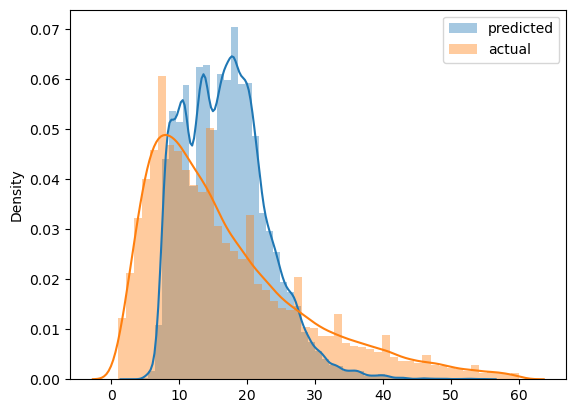

In [39]:
sns.distplot(y_pred, label = "predicted")
sns.distplot(y_train, label = "actual")

plt.legend()